## Tweet classification.
__August, 2018 - Christopher Sanchez - Chris@datasancheneer.com__

Natural language processing, in short, is the interaction between machines and natural human language. There are many popular libraries that assist with machine learning, in which a few will be utilized below.  SpaCy, defined by its masterminds as: "Industrial-strength Natural Language Processing in Python.", will be one of the featured packages below. SpaCy is built in cython and uses highly intelligent hashing algorithms and data storage to cut down on size and improve the speed of processing text. SpaCy has a wide variety of text processing features that are great for extracting various types of grammar and writing habits. Textblob is a simple text processor that has some really handy features like polarity and subjectivity scoring. 

Donald Trump, Barack Obama, Bernie Sanders, Arnold Schwarzenegger, Hillary Clinton, Mazie Hirono, Susan Collins, John Hoeven, Paul Ryan, and John Mccain are all relatively well known politicians. Classification is a form of supervised learning, which attempts to classify data using input variables to predict a pre-deterimined outcome. This is a demonstration utilizing Multionomial Naive Bayes and Random forest classifcation to classify the tweets of the various politicians which were scraped with tweepy. Naive Bayes is an algorithm that has a strong naive assumption that all features are indepenedent of each other. A random forest is an ensemble method that bundles decision trees together to create a forest and makes them random. 

In order use the classifiers it is necessary to build a strong model. Along with the above stated text processors, clustering, principal compononent analysis, and a scalar will be employed. Clustering will be used to visualize how the dataset looks. In order to better visualize the cluster principal component analysis will be used to reduce the dimensions of the data to make it easier for the human eye to see in plots. A MinMax scaler defined by sklearn: This estimator scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one.

Testing of the model will include cross validation, train-test split, and a reserve of 25% of the data. Due to the relatively small size of the dataset a 90% accuracy rate will be considered a success.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans, estimate_bandwidth
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn import ensemble
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
import re
import sys
import warnings
from textblob import TextBlob
import spacy
nlp = spacy.load('en_core_web_lg')
if not sys.warnoptions:
    warnings.simplefilter("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Below is the importation of the various scraped politician files. There are created lists that will be used for iteration in for loops, soon to follow.

In [2]:
trump = pd.read_csv('realDonaldTrump_tweets.csv')
obama = pd.read_csv('BarackObama_tweets.csv')
sanders = pd.read_csv('BernieSanders_tweets.csv')
schwarzenegger = pd.read_csv('Schwarzenegger_tweets.csv')
hclinton = pd.read_csv('HillaryClinton_tweets.csv')
hirono = pd.read_csv('maziehirono_tweets.csv')
hoeven = pd.read_csv('SenJohnHoeven_tweets.csv')
ryan = pd.read_csv('SpeakerRyan_tweets.csv')
mccain = pd.read_csv('SenJohnMcCain_tweets.csv')
collins = pd.read_csv('SenatorCollins_tweets.csv')


democrats = [obama,sanders,schwarzenegger,hclinton,hirono]
republicans = [collins,hoeven,trump,ryan,mccain]
tweeters = [trump,obama,sanders,schwarzenegger,hclinton,hirono,collins,hoeven,ryan,mccain]
tweeters_string = ['trump','obama','sanders','schwarzenegger','hclinton','hirono','collins','hoeven','ryan','mccain']

Everything imported successfully. The individual politician datasets will be passed through various for loops to determine the shape of the data, remove links, and create new columns for the politicians name and political party.

In [3]:
counter = 0

for x in tweeters:
    print(tweeters_string[counter])
    print(x.shape)
    x['text'] = x['text'].str.replace('RT', '').replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
    x['author'] = tweeters_string[counter]
    counter += 1
    
for x in democrats:
    x['party'] = 'democrat'
    
for x in republicans:
    x['party'] = 'republican'


trump
(3242, 3)
obama
(3223, 3)
sanders
(3217, 3)
schwarzenegger
(3220, 3)
hclinton
(3231, 3)
hirono
(3241, 3)
collins
(2826, 3)
hoeven
(2853, 3)
ryan
(3210, 3)
mccain
(3245, 3)


It would be very messy to build a model with several datasets, so pandas concatenation and reset index will be implemented to combine the datasets into one and reset the index so it isn't created with repetitive indexing.

In [4]:
df = pd.concat(x for x in tweeters)
df = df.reset_index(drop=True)

print(df.shape)
print(df.head())

(31508, 5)
                    id           created_at                                               text author       party
0  1033045280143355904  2018-08-24 17:36:02  ...Secretary Pompeo looks forward to going to ...  trump  republican
1  1033045274866999297  2018-08-24 17:36:01  ...Additionally, because of our much tougher T...  trump  republican
2  1033045273361178624  2018-08-24 17:36:00  I have asked Secretary of State Mike Pompeo no...  trump  republican
3  1033023735517863936  2018-08-24 16:10:25                                                     trump  republican
4  1032954224529817600  2018-08-24 11:34:13  Social Media Giants are silencing millions of ...  trump  republican


Sklearns Label Encoder is great for converting categorical variables into integers. 

In [5]:
from sklearn import preprocessing
# Label encoder
le = preprocessing.LabelEncoder()

le.fit(df['author'])

# Convert the author column to integers.
df['author'] = le.transform(df['author'])

# create a dictionary to show the old author names and the converted integer.
le_name_map = (dict(zip(le.classes_, le.transform(le.classes_))))

print(le_name_map)

le.fit(df['party'])

# Convert the party column to integers.
df['party'] = le.transform(df['party'])

print(df.head())



{'collins': 0, 'hclinton': 1, 'hirono': 2, 'hoeven': 3, 'mccain': 4, 'obama': 5, 'ryan': 6, 'sanders': 7, 'schwarzenegger': 8, 'trump': 9}
                    id           created_at                                               text  author  party
0  1033045280143355904  2018-08-24 17:36:02  ...Secretary Pompeo looks forward to going to ...       9      1
1  1033045274866999297  2018-08-24 17:36:01  ...Additionally, because of our much tougher T...       9      1
2  1033045273361178624  2018-08-24 17:36:00  I have asked Secretary of State Mike Pompeo no...       9      1
3  1033023735517863936  2018-08-24 16:10:25                                                          9      1
4  1032954224529817600  2018-08-24 11:34:13  Social Media Giants are silencing millions of ...       9      1


A new column "spacy_text" is created to store parsed data from SpaCy. "Lemma" is another new column that takes the lemmatization from each word and ensures that it isn't a punctuation or a stop word.

In [6]:
# Using the apply function to parse the tweets
df['spacy_text'] = df['text'].astype(str).apply(nlp)

print('Data parsed with spacy successfully.')

# getting a clean list using a lambda function for feature generation later on.
df['lemma'] = df['spacy_text'].apply(lambda row: [token.lemma_ for token in row if not token.is_punct and not token.is_stop])

print('Initialiazed parts of speech columns')

Data parsed with spacy successfully.
Initialiazed parts of speech columns


Below is some general feature engineering to get a count of the uppercase letters, word count, punctuation count, and sentiment analysis.

In [7]:
from datetime import datetime

# Total count of uppercase letters and count of total words.
df['Uppercase'] = df['text'].str.findall(r'[A-Z]').str.len()
df['totalwords'] = [len(x.split()) for x in df['text'].tolist()]

# Count of various punctuation
df['exclamation_marks'] = df['text'].str.findall(r'[!]').str.len()
df['question_marks'] = df['text'].str.findall(r'[?]').str.len()
df['periods'] = df['text'].str.findall(r'[.]').str.len()
df['commas'] = df['text'].str.findall(r'[,]').str.len()
df['punctuation_sum'] = df['exclamation_marks'] + df['question_marks'] + df['periods'] + df['commas']

# Sentimenet analyisis
df['polarity'] = df['text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

# Converting to datetime
df['created_at'] = df['created_at'].replace([r'\s'], ':', regex=True)
df['created_at'] = df['created_at'].astype(str)
df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%d:%H:%M:%S', utc=True)
df['hour'] = df.created_at.dt.hour
df['weekday'] = df.created_at.dt.weekday

Twitter does have a character limit, so total words may not be so effective. Total words per tweet by author:

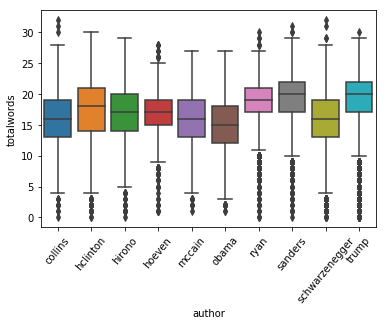

In [8]:
sns.boxplot(x=df.author, y=df.totalwords);
plt.xticks(np.arange(10), ('collins', 'hclinton', 'hirono', 'hoeven', 'mccain', 'obama', 'ryan', 'sanders', 'schwarzenegger', 'trump'), rotation = 50);

Obama has the lowest amount of words per text, but his vocabulary is rather extensive, so the size of word can have some effect on that. Sanders and Trump are tied for the highest amount of words per text

What time do politicians usually tweet? Morning coffee? After work?

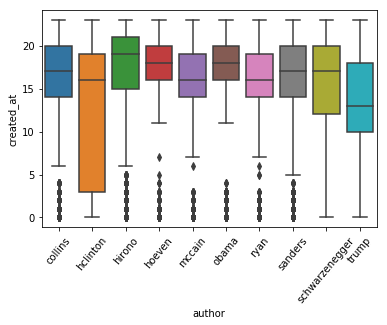

In [9]:
sns.boxplot(x=df.author, y=df.created_at.dt.hour);
plt.xticks(np.arange(10), ('collins', 'hclinton', 'hirono', 'hoeven', 'mccain', 'obama', 'ryan', 'sanders', 'schwarzenegger', 'trump'), rotation = 50);

A vast majority of tweets happen after 3 o clock with the average somewhere around 5 o'clock. Hillary Clinton seems to tweet throughout the day. Obama Tweets mainly at night, and Trump seems to tweet mainly in the late morning to early afternoon.

What day of the week is the most popular for tweeting?

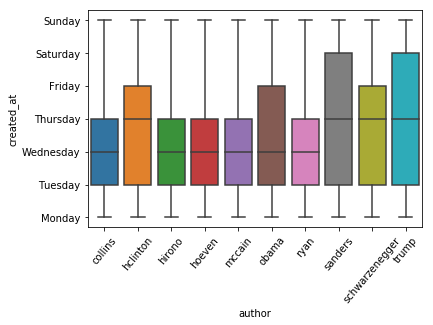

In [10]:
sns.boxplot(x=df.author, y=df.created_at.dt.weekday);
plt.xticks(np.arange(10), ('collins', 'hclinton', 'hirono', 'hoeven', 'mccain', 'obama', 'ryan', 'sanders', 'schwarzenegger', 'trump'), rotation = 50);
plt.yticks(np.arange(7), ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'));

Almost all tweets are conducted on Wednesday's and Thursday's. Sanders and Trump appear to be fans of Twitter, tweeting nearly every day of the week. Tweeting on Sunday's and Monday's in non existent across the board.

The new and improved head.

In [11]:
df.head()

,id,created_at,text,author,party,spacy_text,lemma,Uppercase,totalwords,exclamation_marks,question_marks,periods,commas,punctuation_sum,polarity,subjectivity,hour,weekday
0,1033045280143355904,2018-08-24 17:36:02+00:00,...Secretary Pompeo looks forward to going to ...,9,1,"(..., Secretary, Pompeo, looks, forward, to, g...","[secretary, pompeo, look, forward, to, go, to,...",5,19,0,0,3,1,4,0.150000,0.506250,17,4
1,1033045274866999297,2018-08-24 17:36:01+00:00,"...Additionally, because of our much tougher T...",9,1,"(..., Additionally, ,, because, of, our, much,...","[additionally, because, of, -PRON-, much, toug...",4,19,0,0,3,2,5,0.200000,0.200000,17,4
2,1033045273361178624,2018-08-24 17:36:00+00:00,I have asked Secretary of State Mike Pompeo no...,9,1,"(I, have, asked, Secretary, of, State, Mike, P...","[-PRON-, have, ask, secretary, of, state, mike...",8,24,0,0,0,2,2,0.000000,0.000000,17,4
3,1033023735517863936,2018-08-24 16:10:25+00:00,,9,1,(),[],0,0,0,0,0,0,0,0.000000,0.000000,16,4
4,1032954224529817600,2018-08-24 11:34:13+00:00,Social Media Giants are silencing millions of ...,9,1,"(Social, Media, Giants, are, silencing, millio...","[social, media, giants, be, silence, million, ...",5,21,0,0,1,0,1,0.033333,0.066667,11,4


Df_X will be the dataset that will be used to build the model, and Df_y will be the reserve dataset that will determine whether or not the model can successfully classify data its never seen. 

In [12]:
Df_X, Df_y = train_test_split(df, random_state=24)
Df_X.head()

,id,created_at,text,author,party,spacy_text,lemma,Uppercase,totalwords,exclamation_marks,question_marks,periods,commas,punctuation_sum,polarity,subjectivity,hour,weekday
2213,936339260218724353,2017-11-30 21:00:50+00:00,"Today, it was my great honor to meet with the ...",9,1,"(Today, ,, it, was, my, great, honor, to, meet...","[today, -PRON-, be, -PRON-, great, honor, to, ...",9,22,0,0,1,1,2,0.80,0.75,21,3
2373,928325667556548608,2017-11-08 18:17:41+00:00,Congratulations to all of the ”DEPLORABLES” an...,9,1,"(Congratulations, to, all, of, the, ”, DEPLORA...","[congratulation, to, all, of, the, deplorable,...",21,19,0,0,0,0,0,0.00,1.00,18,2
903,1004455146867306496,2018-06-06 20:09:03+00:00,We must always protect those who protect us. T...,9,1,"(We, must, always, protect, those, who, protec...","[-PRON-, must, always, protect, those, who, pr...",7,22,0,0,1,1,2,0.80,0.75,20,2
27096,916072288679809025,2017-10-05 22:47:08+00:00,"@FoxBusiness: .@SpeakerRyan on #TaxReform: ""T...",6,1,"( , @FoxBusiness, :, .@SpeakerRyan, on, #, Tax...","[ , @foxbusiness, .@speakerryan, on, taxreform...",8,23,0,0,3,0,3,0.00,0.00,22,3
20299,806572378524295168,2016-12-07 18:53:35+00:00,"On the 75th anniv of #PearlHarbor, we honor th...",0,1,"(On, the, 75th, anniv, of, #, PearlHarbor, ,, ...","[on, the, 75th, anniv, of, pearlharbor, -PRON-...",4,20,0,0,1,1,2,0.15,0.30,18,2


Cluster_df is a dataframe created in order to cluster the data using KMeans 

In [13]:
# Clustering algorithms need some form of normalization
scalar = MinMaxScaler()

#Save column names so they aren't lost on transform.
columns = ['party', 'Uppercase', 'exclamation_marks', 'question_marks', 'periods', 'commas', 'punctuation_sum', 'totalwords', 'polarity', 'subjectivity', 'hour', 'weekday']

# Drop uneccessary categories.
Cluster_X = Df_X.drop(['id', 'author', 'text', 'spacy_text','lemma', 'created_at'], 1)
Cluster_df = scalar.fit_transform(Cluster_X)
Cluster_df = pd.DataFrame(Cluster_df, columns=columns)
X_pca = PCA(2).fit_transform(Cluster_df)

KMeans with a cluster of 4 can be seen below. PCA is used for the visualization.

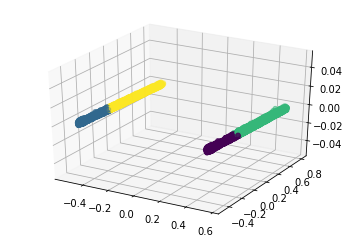

0.5770072449317204


In [14]:
# Calculate predicted values.
km = KMeans(n_clusters=4, random_state=42).fit(Cluster_df)
km_labels = km.labels_

Cluster_df['KMeansLabels'] = pd.Series(km_labels, index=Cluster_df.index)

# Plot the solution.
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1],c=km_labels)
plt.show()

from sklearn import metrics
    
#metrics.adjusted_rand_score(y, y_pred)

print(metrics.silhouette_score(Cluster_df, km_labels, metric='euclidean'))

In [15]:
# Group by labels to display how the clusters were formed.
group_by_kmeans = Cluster_df.groupby('KMeansLabels').mean()
group_by_kmeans.head()

,party,Uppercase,exclamation_marks,question_marks,periods,commas,punctuation_sum,totalwords,polarity,subjectivity,hour,weekday
KMeansLabels,,,,,,,,,,,,
0,1.0,0.076996,0.504768,0.011590,0.003091,0.063881,0.070286,0.105135,0.507634,0.082178,0.694097,0.403833
1,0.0,0.061061,0.498175,0.015553,0.010887,0.084864,0.060603,0.124726,0.509962,0.072161,0.668439,0.429186
2,1.0,0.076132,0.560793,0.024879,0.003284,0.070573,0.078214,0.123832,0.656737,0.646206,0.674048,0.425951
3,0.0,0.059043,0.545256,0.018235,0.009516,0.091690,0.071346,0.137935,0.639549,0.631850,0.657180,0.426015


The silhouette score and group by KMeans indicates that there is a decent amount of similarity. It clearly split by party, polarity and subjectivity with the other features being relatively useless.

Below is the Df_X scaled for classification and split using train-test split for testing. 

In [16]:
scaled_X = Df_X.drop(['id', 'author', 'text', 'spacy_text','lemma', 'created_at'], 1)
scaled_X = scalar.fit_transform(scaled_X)

y = Df_X.author

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, random_state=24)

The first benchmark test will be determined to see how well the classifiers work without any further engineering.

Multinomial Naive Bayes and Random forest classifiers can be seen below.

In [17]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

print('Training set score:', mnb.score(X_train, y_train))
print('\nTest set score:', mnb.score(X_test, y_test))
print('\nCross Val score:',cross_val_score(mnb, X_test, y_test, cv=5))

Training set score: 0.3540032725836484

Test set score: 0.3366621530128639

Cross Val score: [0.34261603 0.34966216 0.32037194 0.3559322  0.34693878]


Interestingly the Naive Bayes did better in the cross validation score than the test score. 33% is a horrible score much improvement must be made. 

Random forest classifier:

In [18]:
rfc = ensemble.RandomForestClassifier()

rfc.fit(X_train, y_train)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))
print('\nCross Val score:',cross_val_score(rfc, X_test, y_test, cv=5))

Training set score: 0.9803644981098009

Test set score: 0.4160460392687881

Cross Val score: [0.39493671 0.38682432 0.38123415 0.41694915 0.40306122]


Another surprise. Naive Bayes is usually the power house when it comes to text classification, but the random forest has it beat, however there does seem to be quite a bit of overfitting going on.

Bag of words is a method which entails getting a count of all the words in the corpus, and using them as features. It sounds rudimentary, but it is actually quite powerful. CountVectorizer is a simple and efficient method to create a bag of words model. Countvectorizer has many parameters that allows a lot of customization. The 2000 most common words will be used as features. A new dataframe will be created to combine the new features with the original dataframe.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# Setting max features to 1500 will choose the 2000 with the highest count.
vectorizer = CountVectorizer(max_features=2000, stop_words='english')
# Train the model and transform it to a sparse matrix with X_train.
train_matrix = vectorizer.fit_transform(Df_X.lemma.astype(str))

# combining vectorizer with df
count_vect_train = pd.DataFrame(train_matrix.todense(), columns=vectorizer.get_feature_names())

# Converting Df_X and count vect train to matrix's for concatenation
Df_X_train_matrix = Df_X.as_matrix()
count_train_matrix = count_vect_train.as_matrix()

# concatenating the matrices
BoW_train = np.concatenate([Df_X_train_matrix, count_train_matrix], axis=1)

# Converting matrix to dataframe.
train_Bow = pd.DataFrame(BoW_train)


The new train_Bow dataframe has been created and will be accessed for further testing.

In [20]:
train_Bow.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,936339260218724353,2017-11-30 21:00:50+00:00,"Today, it was my great honor to meet with the ...",9,1,"(Today, ,, it, was, my, great, honor, to, meet...","[today, -PRON-, be, -PRON-, great, honor, to, ...",9,22,0,0,1,1,2,0.8,0.75,21,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,928325667556548608,2017-11-08 18:17:41+00:00,Congratulations to all of the ”DEPLORABLES” an...,9,1,"(Congratulations, to, all, of, the, ”, DEPLORA...","[congratulation, to, all, of, the, deplorable,...",21,19,0,0,0,0,0,0,1,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Dropping uneccessary columns and splitting the data.

In [21]:
Bow_train_X = train_Bow.drop([0, 1, 2, 4, 5, 6], 1)
Bow_train_X = scalar.fit_transform(Bow_train_X)
Bow_train_y = train_Bow[3].astype(int)

Bow_X_train, Bow_X_test, Bow_y_train, Bow_y_test = train_test_split(Bow_train_X, Bow_train_y, random_state=24)

Now that the data is split it can be used to see how much (or little) the bag of words method has improved the classification of the data.

In [22]:
# Multinomial Naive Bayes
mnb.fit(Bow_X_train, Bow_y_train)

print('Training set score:', mnb.score(Bow_X_train, Bow_y_train))
print('\nTest set score:', mnb.score(Bow_X_test, Bow_y_test))
print('\nCross Val score:',cross_val_score(mnb, Bow_X_test, Bow_y_test, cv=5))

Training set score: 0.8128420696270383

Test set score: 0.754062288422478

Cross Val score: [0.72236287 0.72297297 0.69737954 0.71610169 0.72108844]


In [23]:
# Random forest
rfc.fit(Bow_X_train, Bow_y_train)

print('Training set score:', rfc.score(Bow_X_train, Bow_y_train))
print('\nTest set score:', rfc.score(Bow_X_test, Bow_y_test))
print('\nCross Val score:',cross_val_score(rfc, Bow_X_test, Bow_y_test, cv=5))

Training set score: 0.9985329797438357

Test set score: 0.8556194989844279

Cross Val score: [0.83122363 0.80658784 0.79374472 0.78728814 0.7755102 ]


The random forest classifier is still performing very well and has by far surpassed the Naive Bayes classifier with a test score of nearly 85% and an average of 80% across the cross validation score.

Tf-idf is used to determine the importance and recurrence of a word use a weighting system.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# The tf-idf vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

# Fit and transform Df_X with the tfidf vectorizer.
tfidf_train_matrix = tfidf_vectorizer.fit_transform(Df_X.lemma.astype(str))

print("Number of features: %d" % tfidf_train_matrix.get_shape()[1])
tfidf_train_df= pd.DataFrame(tfidf_train_matrix.todense(), columns=tfidf_vectorizer.get_feature_names())

Df_X_train_matrix = Df_X.as_matrix()
tfidf_train_matrix = tfidf_train_df.as_matrix()


# Concatenating Df_X with the tfidf features
tfidf_train = np.concatenate([Df_X_train_matrix, tfidf_train_matrix], axis=1)

train_tfidf = pd.DataFrame(tfidf_train)


Number of features: 10599


The Tf-Idf vectorizer created 10,599 new features. A new dataframe called train_tfidf was created to combine the features with Df_X

Dropping uneccessary columns and splitting the data.

In [25]:
train_tfidf_X = train_tfidf.drop([0, 1, 2, 4, 5, 6], 1)
train_tfidf_X = scalar.fit_transform(train_tfidf_X)
train_tfidf_y = train_tfidf[4].astype(int)

tfidf_X_train, tfidf_X_test, tfidf_y_train, tfidf_y_test = train_test_split(train_tfidf_X, train_tfidf_y, random_state=24)

Examining the effectiveness of the tf-idf method.

In [26]:
# Naive Bayes
mnb.fit(tfidf_X_train, tfidf_y_train)

print('Training set score:', mnb.score(tfidf_X_train, tfidf_y_train))
print('\nTest set score:', mnb.score(tfidf_X_test, tfidf_y_test))
print('\nCross Val score:',cross_val_score(mnb, tfidf_X_test, tfidf_y_test, cv=5))

Training set score: 0.9419962760255036

Test set score: 0.8987813134732566

Cross Val score: [0.87573964 0.87563452 0.87722269 0.87298899 0.85774767]


In [27]:
# Random forest
rfc = ensemble.RandomForestClassifier()

rfc.fit(tfidf_X_train, tfidf_y_train)

print('Training set score:', rfc.score(tfidf_X_train, tfidf_y_train))
print('\nTest set score:', rfc.score(tfidf_X_test, tfidf_y_test))
print('\nCross Val score:',cross_val_score(rfc, tfidf_X_test, tfidf_y_test, cv=5))

Training set score: 0.997348078767703

Test set score: 0.9214624238320921

Cross Val score: [0.8808115  0.87394247 0.86875529 0.86875529 0.86282811]


The random forest model has a higher test set score and a higher average cross validation score, but it does have some overfitting going on. It seems to outperform the Naive Bayes model, but the overfitting may not make the model very stable.

Tfidf was clearly superior to the bag of words method in this instance. The test dataframe, Df_y, will be tested with the tfidf model. 

In [28]:
# Transforming the data with the the tfidf vectorizer
tfidf_test_matrix = tfidf_vectorizer.transform(Df_y.lemma.astype(str))

# converting the fectorized df to a dense matrix and dataframe
tfidf_test_df = pd.DataFrame(tfidf_test_matrix.todense(), columns=tfidf_vectorizer.get_feature_names())

# Converting Df_y and tfidf_test_matrix to matrix 
Df_y_test_matrix = Df_y.as_matrix()
tfidf_test_matrix = tfidf_test_df.as_matrix()

# Concatenating the data matrices and converting to new dataframe "test_tfidf
tfidf_test = np.concatenate([Df_y_test_matrix, tfidf_test_matrix], axis=1)
test_tfidf = pd.DataFrame(tfidf_test)

# Dropping uneccessary columns and splitting the data
test_tfidf_X = test_tfidf.drop([0, 1, 2, 5, 6], 1)
test_tfidf_X = scalar.fit_transform(test_tfidf_X)

test_tfidf_y = test_tfidf[4].astype(int)

test_tfidf_X_train, test_tfidf_X_test, test_tfidf_y_train, test_tfidf_y_test = train_test_split(test_tfidf_X, test_tfidf_y, random_state=24)

First the data will be clustered using KMeans to determine whether it is consistent with the original test.

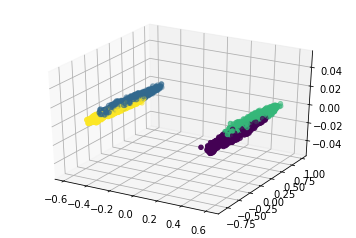

Adjusted rand score: 0.5169523379466453
Silhuette score: 0.02131164569325797


In [29]:
test_pca = PCA(2).fit_transform(test_tfidf_X)
# Calculate predicted values.
km = KMeans(n_clusters=4, random_state=24).fit(test_tfidf_X)
km_labels = km.labels_

test_tfidf['KMeansLabels'] = pd.Series(km_labels)
# Plot the solution.

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(test_pca[:, 0], test_pca[:, 1],c=km_labels)

plt.show()

from sklearn import metrics

y_pred = km.predict(test_tfidf_X)

#metrics.adjusted_rand_score(y, y_pred)
print('Adjusted rand score:', metrics.adjusted_rand_score(test_tfidf_y, y_pred))
print('Silhuette score:', metrics.silhouette_score(test_tfidf_X, km_labels, metric='euclidean'))

The clustered data looks very similar to the first cluster. It looks like the model is still clustering about the same.

Naive Bayes had slightly lower scores, but it was much more consistent than that random forest attempts, so the data will be tested below utilizing the Naive Bayes model.

In [30]:
mnb.fit(test_tfidf_X_train, test_tfidf_y_train)

print('Training set score:', mnb.score(test_tfidf_X_train, test_tfidf_y_train))
print('\nTest set score:', mnb.score(test_tfidf_X_test, test_tfidf_y_test))
print('\nCross Val score:',cross_val_score(mnb, test_tfidf_X_test, test_tfidf_y_test, cv=5))

Training set score: 0.9918740477399696

Test set score: 0.9710659898477157

Cross Val score: [0.9443038  0.96455696 0.94923858 0.93129771 0.95419847]


Fantastic! A 97% accuracy rate. The Naive Bayes model is working very well and is exceeding expectations.

## Discussion and Conclusion:
A lot was accomplished in a short amount of time. First the individual datasets were imported, cleaned up a little and combined into one dataframe. It was then necessary to further process the text by converting the categorical features to numerical, lemmatizing the tweets, removing punctuation and stop words, getting a count of the punctuation, sentiment analysis, and word count.

Next the data was split into two separate data sets. The first data set Df_X was used to build the models, and the second data set Df_y was used at the end to determine whether or not the model model was improving and performing consistently with data it's never processed before. 

The first dataset was clustered with KMeans using 4 clusters, and it separated the clusters by sentiment, and political party consistently. It was then tested with a Multinomial Naive Bayes classifier and a Random Forest classifier to set a benchmark score of the slightly processed data.

Bag of words is an unsupervised learning algorithm that gets a count of all the words. Bag of words was used to create a new dataframe with the 2000 most common words used in the tweets. The new dataframe was then tested with the same classifiers Naive Bayes and Random Forest. It achieved test scores of 75% accuracy for the Naive Bayes and 85% for the Random Forest, however the Random Forest classifier seemed to be wanting to overfit.

After implementing the bag of words model, the next unsupervised feature engineering technique known as Tf-idf was used. Tf-idf works by getting a count of the sentences or total that a word appears in the text. It is then weighted based on how often the word appears. The Tf-idf model was highly effective. It created 10,599 features. After the new dataframe was created with the new features. It was tested, and it did well achieving rates of 90% for the Naive Bayes classifier and 92% for the Random Forest classifier, though that RFC did want to overfit again.

The Tf-idf model reached our success mark of 90% with both classifiers, with Naive Bayes being the most consistent. Df_y was used to test the Tf-idf model and Naive Bayes classifier, on new unseen data. The clusters remained similar and the Naive Bayes classifier did an excellent job with a 97% accuracy rate. This experiment has been highly successful.